In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
no_pca_results_df = pd.read_csv('C:\\Users\\Noman\Desktop\\cowlar task 1\\results\\knn_results.csv')
pca_results_df = pd.read_csv('C:\\Users\\Noman\Desktop\\cowlar task 1\\results\\knn_results_pca.csv')

In [8]:
def create_pivot_table(df, group_by_columns, value_columns):
    """Create pivot table for a given value_columns aggragated by a given group_by_column"""
    pivot_tables = {}

    for group_by_column in group_by_columns:
        for value_column in value_columns:
            key = f"pivot_table_{group_by_column[:3]}_{value_column[:3]}"
            pivot_tables[key] = df.groupby(group_by_column)[value_column].mean()
    return pivot_tables

In [9]:
def plot_pivot_tables(pivot_tables, group_by_columns, values_columns):
    """Display pivot tables in bar charts"""
    for i, group_by_column in enumerate(group_by_columns):
        fig, axs = plt.subplots(1, len(values_columns), figsize=(15, 5))
        for j, value_column in enumerate(values_columns):
            key = f"pivot_table_{group_by_column[:3]}_{value_column[:3]}"
            sorted_values = pivot_tables[key].sort_values(ascending=value_column!='average_accuracy')
            sorted_values.plot(ax=axs[j], kind='bar')
            axs[j].set_title(f'Mean of {value_column} across {group_by_column}')
            axs[j].set_xlabel(group_by_column)
            axs[j].set_ylabel(value_column)
            
            # Add the exact value on top of each bar
            for x, y in enumerate(sorted_values):
                axs[j].text(x, y, str(round(y, 4)), ha='center', va='bottom')
        plt.tight_layout()
        plt.show()

In [10]:
group_by_columns = ['k_value', 'distance_algo', 'number_of_labels', 'training_test_pair']
values_columns = ['average_accuracy', 'std_accuracy', 'computation_time']

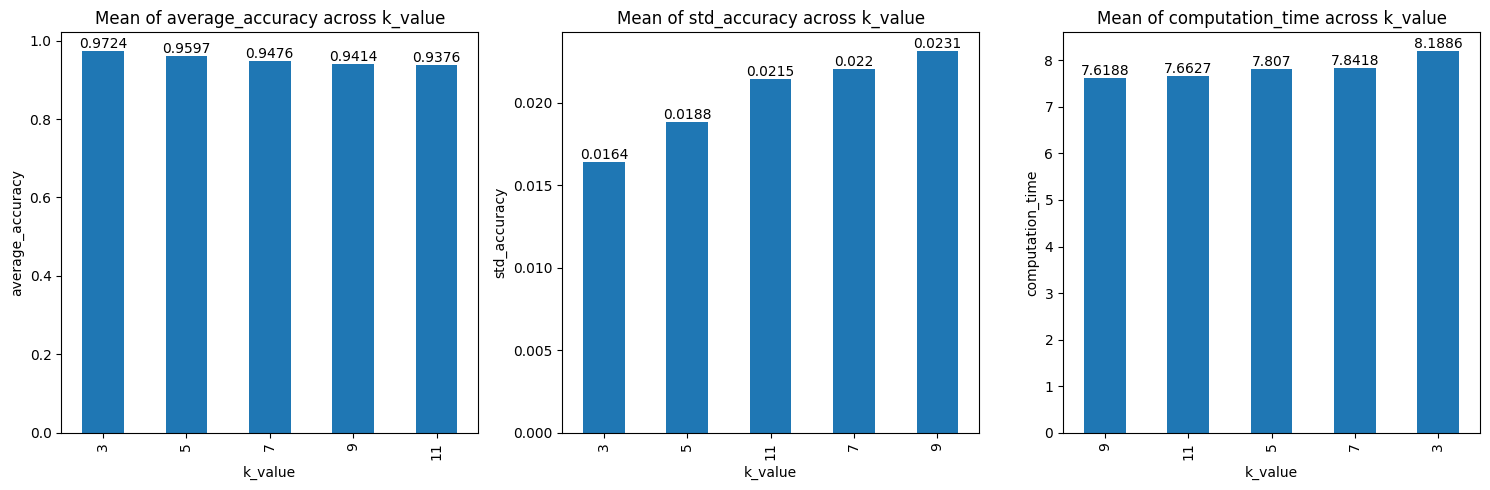

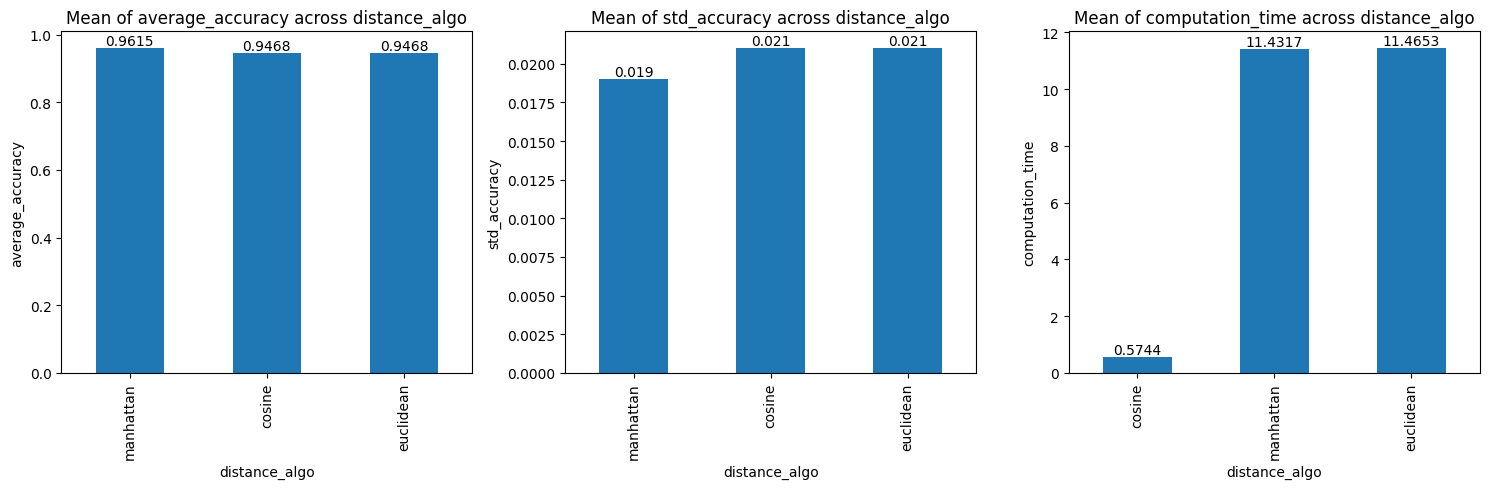

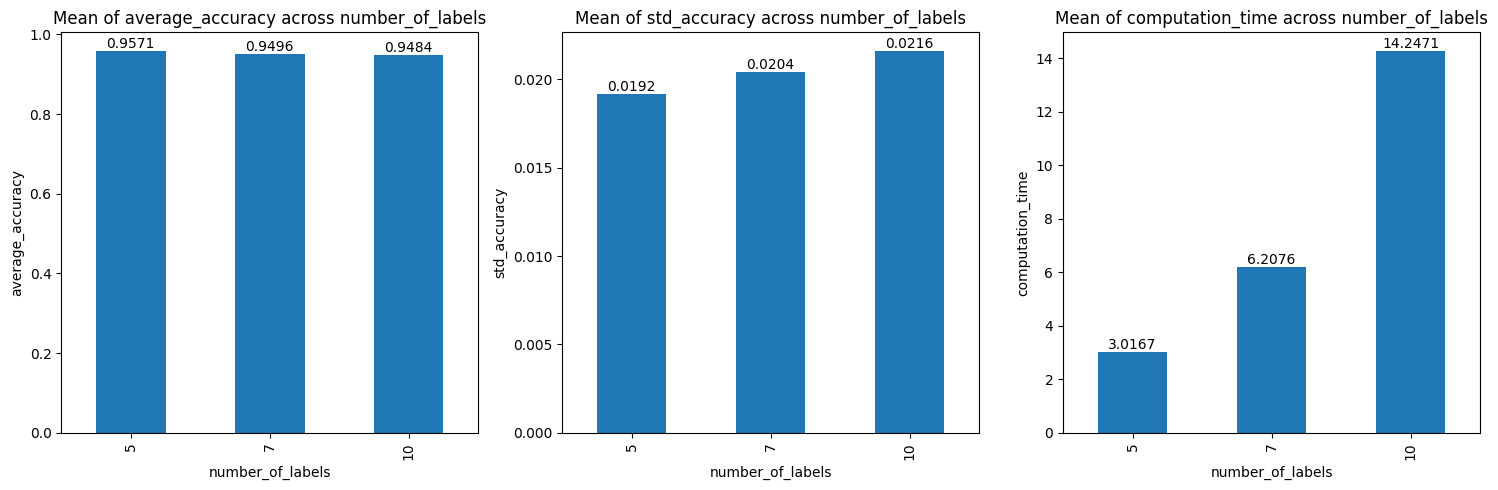

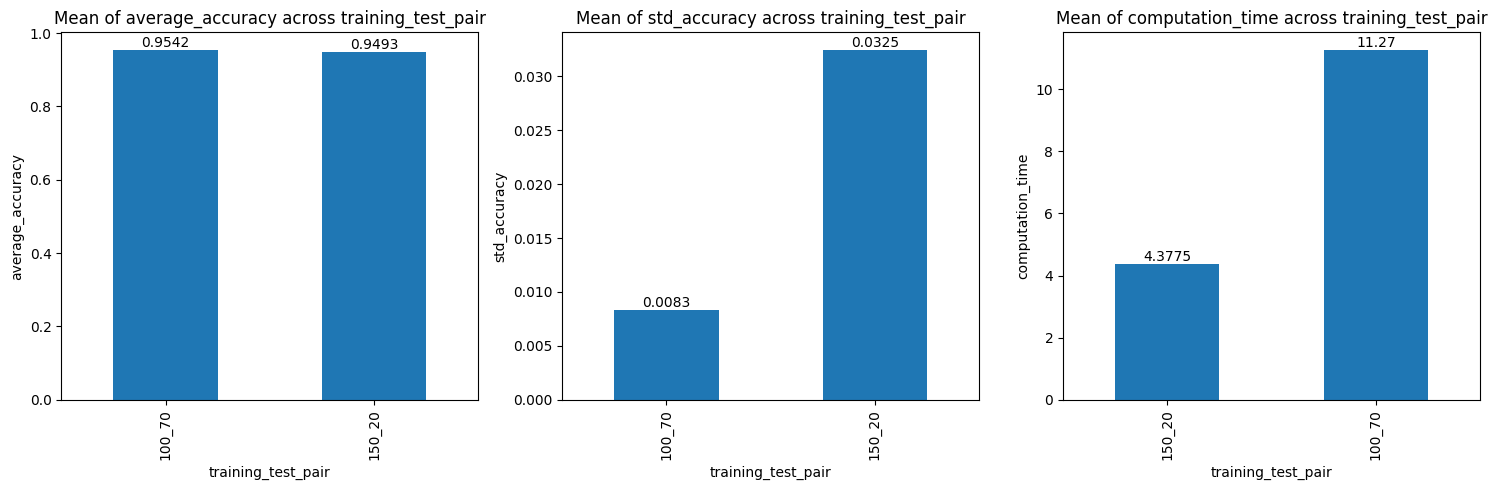

In [11]:

pivot_tables = create_pivot_table(no_pca_results_df, group_by_columns, values_columns)
plot_pivot_tables(pivot_tables, group_by_columns, values_columns)

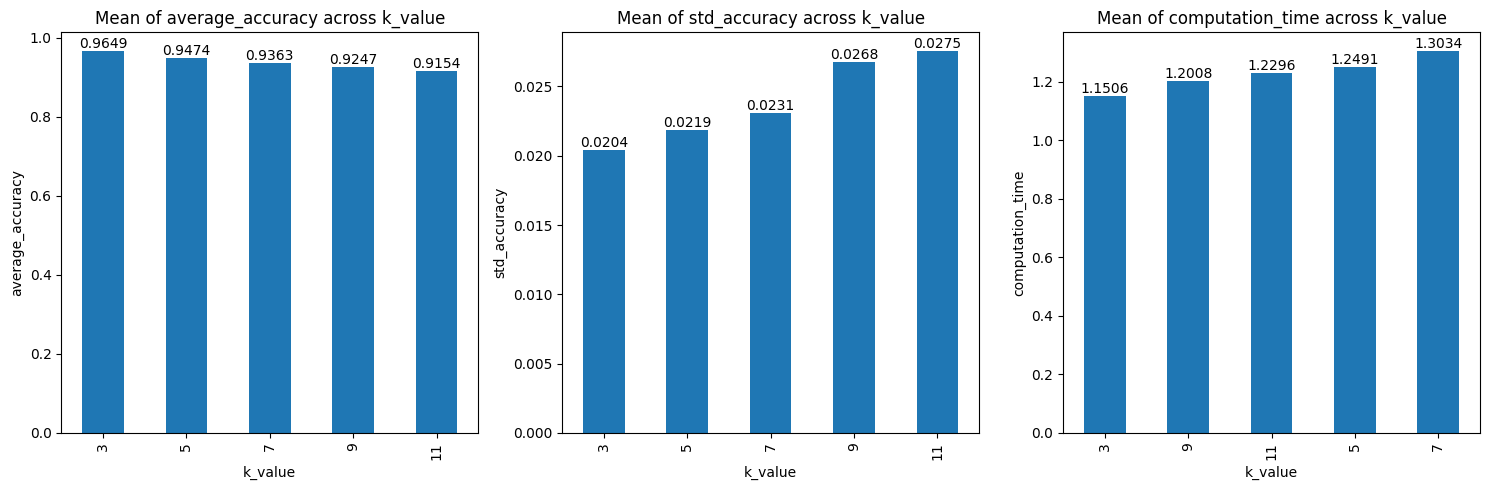

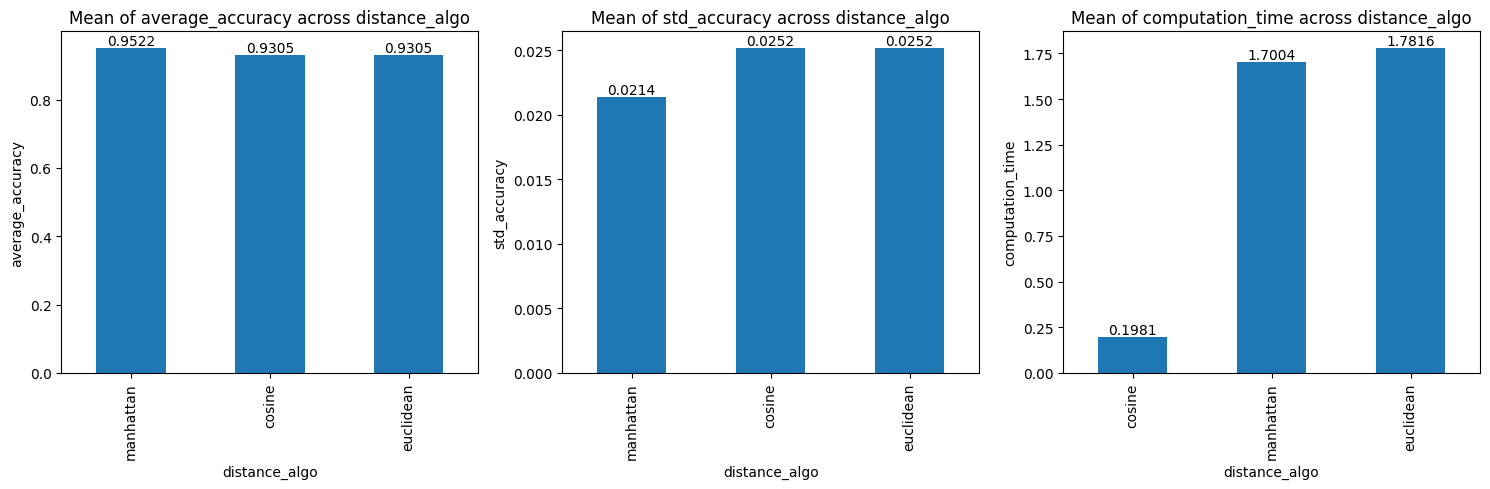

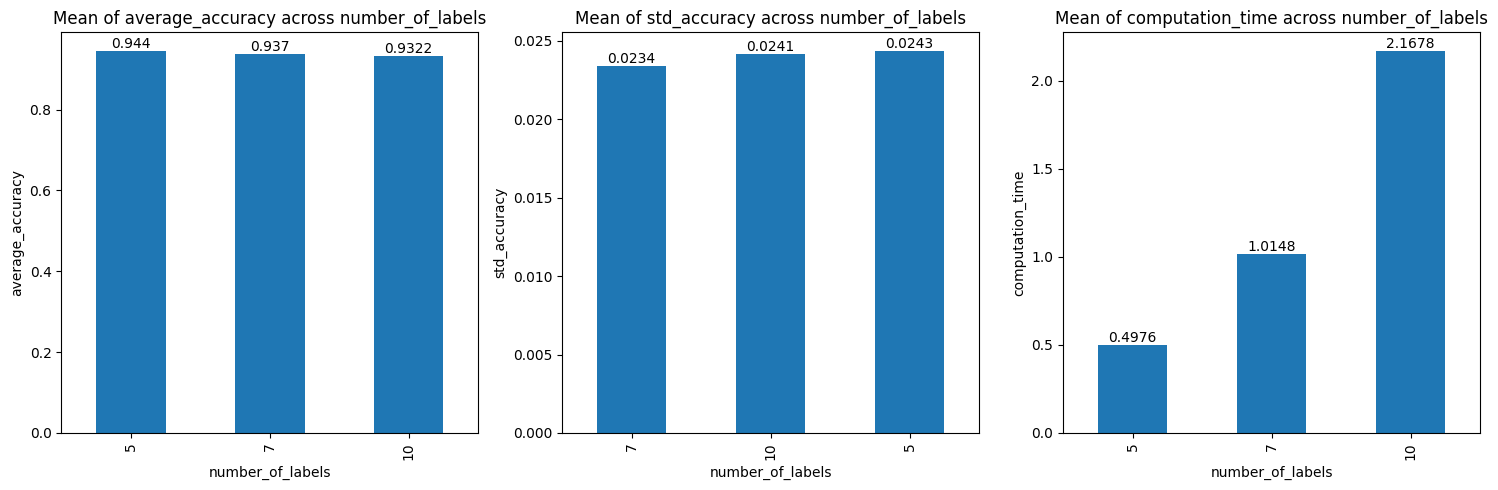

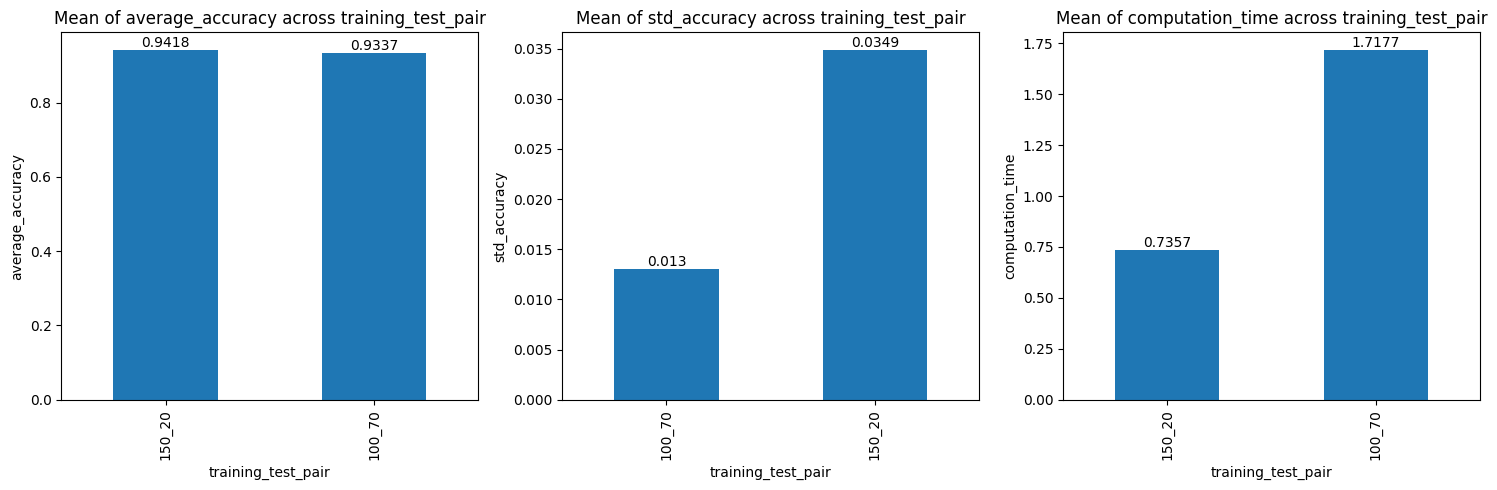

In [12]:

pivot_tables = create_pivot_table(pca_results_df, group_by_columns, values_columns)
plot_pivot_tables(pivot_tables, group_by_columns, values_columns)